In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
dataset = pd.read_csv('CAR_DETAILS.csv')
dataset.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner


In [3]:
dataset.shape

(4340, 8)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [8]:
dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3, 'Electric':4}},inplace=True)
dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
dataset.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}},inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


In [10]:
x = dataset.drop(['name','selling_price'],axis=1)
y = dataset['selling_price']

In [11]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      1
1     2007      50000     0            1             0      1
2     2012     100000     1            1             0      1
3     2017      46000     0            1             0      1
4     2014     141000     1            1             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      2
4336  2014      80000     1            1             0      2
4337  2009      83000     0            1             0      2
4338  2016      90000     1            1             0      1
4339  2016      40000     0            1             0      1

[4340 rows x 6 columns]


In [12]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [14]:
#Linear Regression
lm = LinearRegression()

In [15]:
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
training_data_prediction = lm.predict(X_train)

In [17]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42763612850186783


In [18]:
test_data_prediction = lm.predict(X_test)

In [19]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.502799935375341


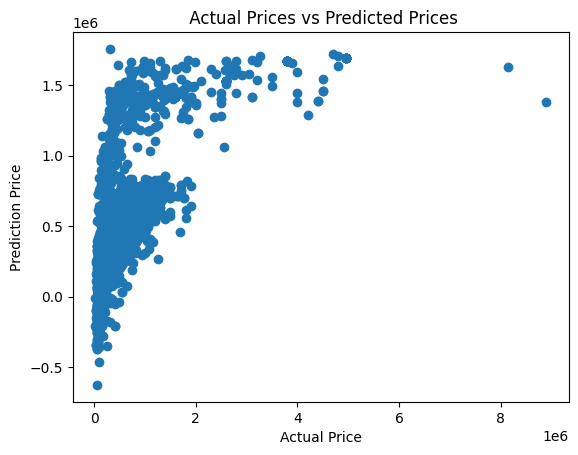

In [20]:
#Visualise the actual prices and prediction
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

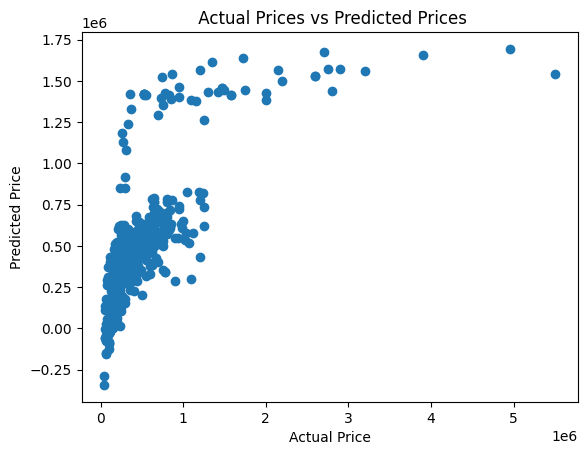

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [23]:
#Lasso Regression
lrm = Lasso()
lrm.fit(X_train, Y_train)

Lasso()

In [24]:
training_data_prediction = lrm.predict(X_train)

In [25]:
errScore = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ",errScore)

R squared Error :  0.4276361284468657


In [26]:
test_data_prediction = lrm.predict(X_test)

In [27]:
errScore = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ",errScore)

R squared Error :  0.5027994839428175


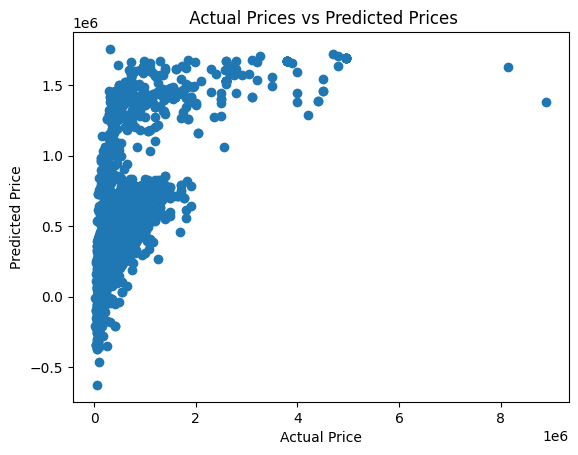

In [28]:
#Visualise the actual price and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

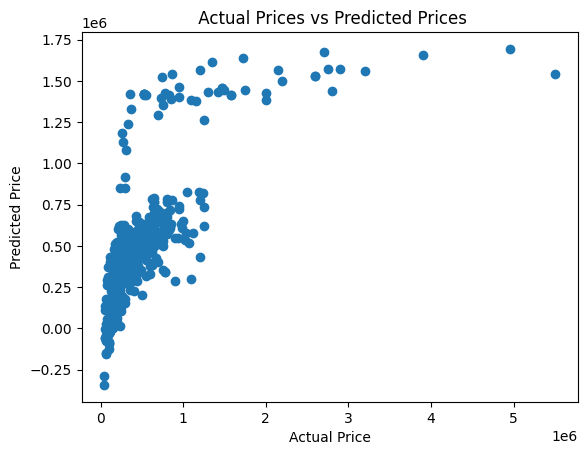

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()